# Hyperparamter Tuning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk 
import io
import random
import string
import warnings

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from collections import Counter 
from sklearn.linear_model import LogisticRegression

# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook


# Saving models
import pickle
import gc
import re
import string
import operator
from collections import defaultdict

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns


from wordcloud import STOPWORDS


from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score

SEED = 1337
import time
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
new_df =pd.read_csv('Train.csv')
test_df =pd.read_csv('Test.csv')

In [3]:
def clean_tweets(message):
    
    #change all words into lower case
    message = message.lower()
    
    url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    web = 'url-web'
    
    message = re.sub(url, web, message)
    
    message = re.sub(r'[^\w\s]','',message)
    message  = "".join([char for char in message if char not in string.punctuation])
    message = re.sub('[0-9]+', '', message)
    
    nltk_stopword = nltk.corpus.stopwords.words('english')
    nltk_stopword.extend('https')
    
    message = ' '.join([item for item in message.split() if item not in nltk_stopword])
    
    return message


new_df['message']=new_df['message'].apply(clean_tweets)
test_df['message']=test_df['message'].apply(clean_tweets)

In [4]:
stopwords = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
def cleaning (text):
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stopwords]
    text = " ".join(text)
    text = re.sub('ãââ', '', text)
    return text

new_df['message'] = new_df['message'].apply(lambda x:cleaning(x))
test_df['message'] = test_df['message'].apply(lambda x:cleaning(x))

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf =TfidfVectorizer(stop_words='english',min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))

Xtr =tfidf.fit_transform(new_df['message'])


## Grid search using TfidfVectorizer

In [12]:
X=Xtr
y=new_df['sentiment']
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size =0.05, random_state =42)

## Logistic regression

In [13]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train)
start_time = time.time()
# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.746273465271343


In [14]:
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [ 31.6227766016837931]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
start_time = time.time()


In [15]:
# summarize results
print("Execution time: " + str((time.time() - start_time)) + ' ms')
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Execution time: 6.477973937988281 ms
Best: 0.966667 using {'C': 31.622776601683793, 'penalty': 'l2', 'solver': 'liblinear'}


## Grid search using SVM

## First method

In [ ]:
### takes time

from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(Xtr, y_train) 


In [34]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Best: 0.976000 using {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}
Execution time: 0.006975889205932617 ms


### Second method

In [ ]:
# playing with parameters

In [ ]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
start_time = time.time()


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


## Testing models

#### Logistic regression

In [17]:
logsR= LogisticRegression(C = 31.622776601683793, penalty = 'l2', solver ='liblinear')
logsR.fit(X_train, y_train)  

LogisticRegression(C=31.622776601683793, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
prediction2 =logsR.predict(X_test)
print(metrics.accuracy_score(y_test,prediction2))

0.7737041719342604


In [46]:
print(metrics.classification_report(y_test,prediction2))

              precision    recall  f1-score   support

          -1       0.77      0.44      0.56        61
           0       0.69      0.37      0.48       123
           1       0.77      0.91      0.84       441
           2       0.82      0.82      0.82       166

    accuracy                           0.77       791
   macro avg       0.76      0.64      0.68       791
weighted avg       0.77      0.77      0.76       791



Logistic: ROC AUC=0.720


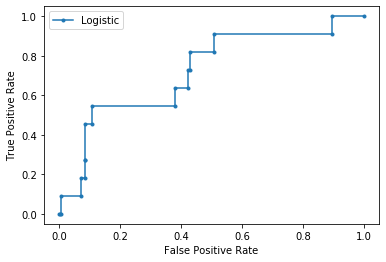

In [16]:

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
X_trainX, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(C =3.727593720314938, penalty = 'l2', solver ='liblinear')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores

print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### SVM.SVC

In [43]:
from sklearn.svm import SVC
fiting = SVC(C= 0.01, gamma ='scale', kernel ='rbf')

In [44]:
fiting.fit(X_train, y_train)  

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
# Form a prediction set
prediction3 = fiting.predict(X_test)

In [41]:
print(metrics.accuracy_score(y_test,prediction1))

0.729456384323641


In [42]:
print(metrics.classification_report(y_test,prediction3))

              precision    recall  f1-score   support

          -1       0.94      0.25      0.39        61
           0       0.78      0.17      0.28       123
           1       0.69      0.96      0.80       441
           2       0.88      0.72      0.79       166

    accuracy                           0.73       791
   macro avg       0.82      0.52      0.56       791
weighted avg       0.76      0.73      0.69       791

